In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data =pd.read_csv("F:\\0. The Data Psychology\\4. New_Machine Learning\\5. SVM\iris.xls")

In [4]:
df = data.copy()

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
37,4.9,3.6,1.4,0.1,setosa
116,6.5,3.0,5.5,1.8,virginica
144,6.7,3.3,5.7,2.5,virginica
89,5.5,2.5,4.0,1.3,versicolor
133,6.3,2.8,5.1,1.5,virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [13]:
df.shape

(150, 5)

In [16]:
df['sepal length (cm)'].value_counts()

sepal length (cm)
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [17]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [19]:
df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
species              150
dtype: int64

In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


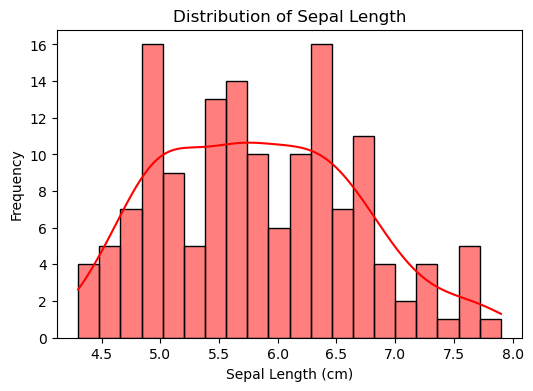

In [22]:
# Distribution plot: Sepal length
plt.figure(figsize=(6, 4))
sns.histplot(df['sepal length (cm)'], kde=True, bins=20, color='red')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


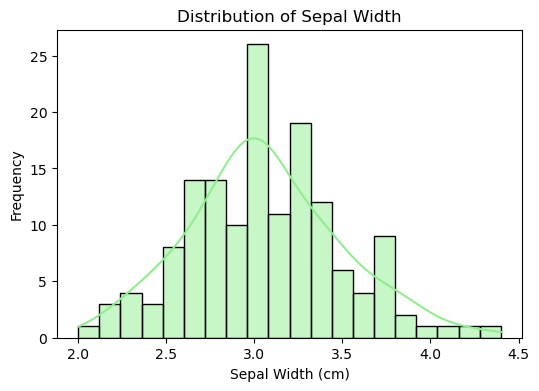

In [23]:
# Distribution plot: Sepal width
plt.figure(figsize=(6, 4))
sns.histplot(df['sepal width (cm)'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()


In [24]:
import warnings
warnings.filterwarnings("ignore")

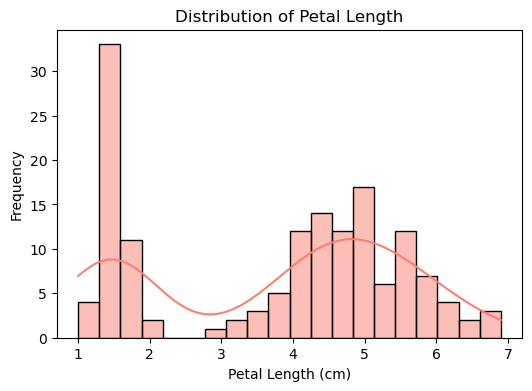

In [25]:
# Distribution plot: Petal length
plt.figure(figsize=(6, 4))
sns.histplot(df['petal length (cm)'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

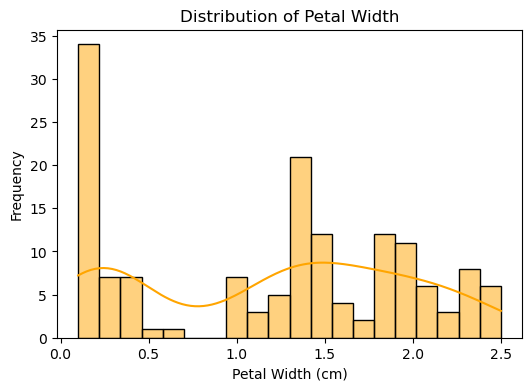

In [26]:
# Distribution plot: Petal width
plt.figure(figsize=(6, 4))
sns.histplot(df['petal width (cm)'], kde=True, bins=20, color='orange')
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

In [31]:
corr_matrix= df.iloc[:, 0:4].corr()

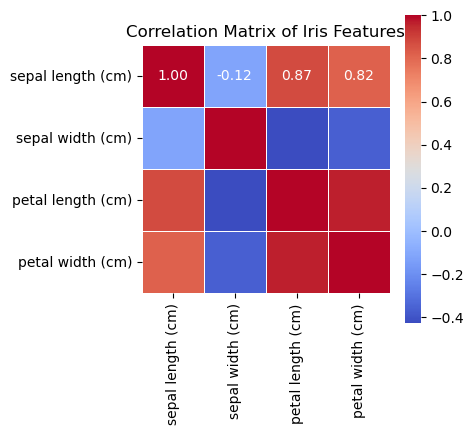

In [33]:
# Plot the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')
plt.show()

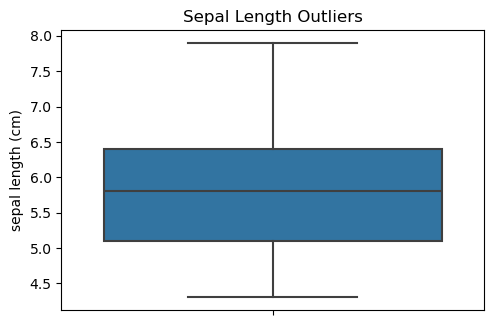

In [34]:
plt.figure(figsize=(12, 8))

# Plot boxplots one by one
plt.subplot(2, 2, 1)
sns.boxplot(y=data['sepal length (cm)'])
plt.title('Sepal Length Outliers')
plt.show()

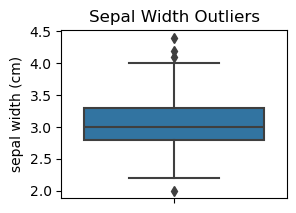

In [37]:
plt.subplot(2, 2, 2)
sns.boxplot(y=data['sepal width (cm)'])
plt.title('Sepal Width Outliers')
plt.show()

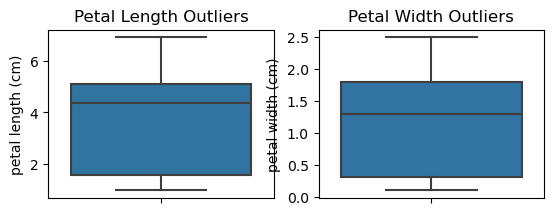

In [38]:
plt.subplot(2, 2, 3)
sns.boxplot(y=data['petal length (cm)'])
plt.title('Petal Length Outliers')

plt.subplot(2, 2, 4)
sns.boxplot(y=data['petal width (cm)'])
plt.title('Petal Width Outliers')
plt.show()

In [ ]:
Yes, Support Vector Classifier (SVC) can be impacted by outliers, but the extent depends on the kernel and parameters used.

How outliers affect SVC:
SVC tries to find the maximum margin hyperplane that separates classes.

Outliers, especially those close to or inside the margin, can shift the decision boundary, causing:

Reduced margin size.

Poor generalization on unseen data.

Potential misclassification.

Key points:
Hard-margin SVM (no slack) is highly sensitive to outliers because it requires perfect separation.

Soft-margin SVM (with slack variable C) allows some misclassification, making it more robust to outliers by penalizing errors.

Kernel choice can also influence sensitivity; nonlinear kernels (e.g., RBF) might be less interpretable regarding outliers but can still be influenced.

Mitigation:
Use soft-margin SVM with an appropriate regularization parameter C.

Perform outlier detection and removal before training.

Consider robust scaling or feature transformation to reduce outlier impact.

In [42]:
# Calculate IQR for each numeric feature
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

In [43]:
# Filter out outliers
data_no_outliers = df[~((df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-1] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
data_no_outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


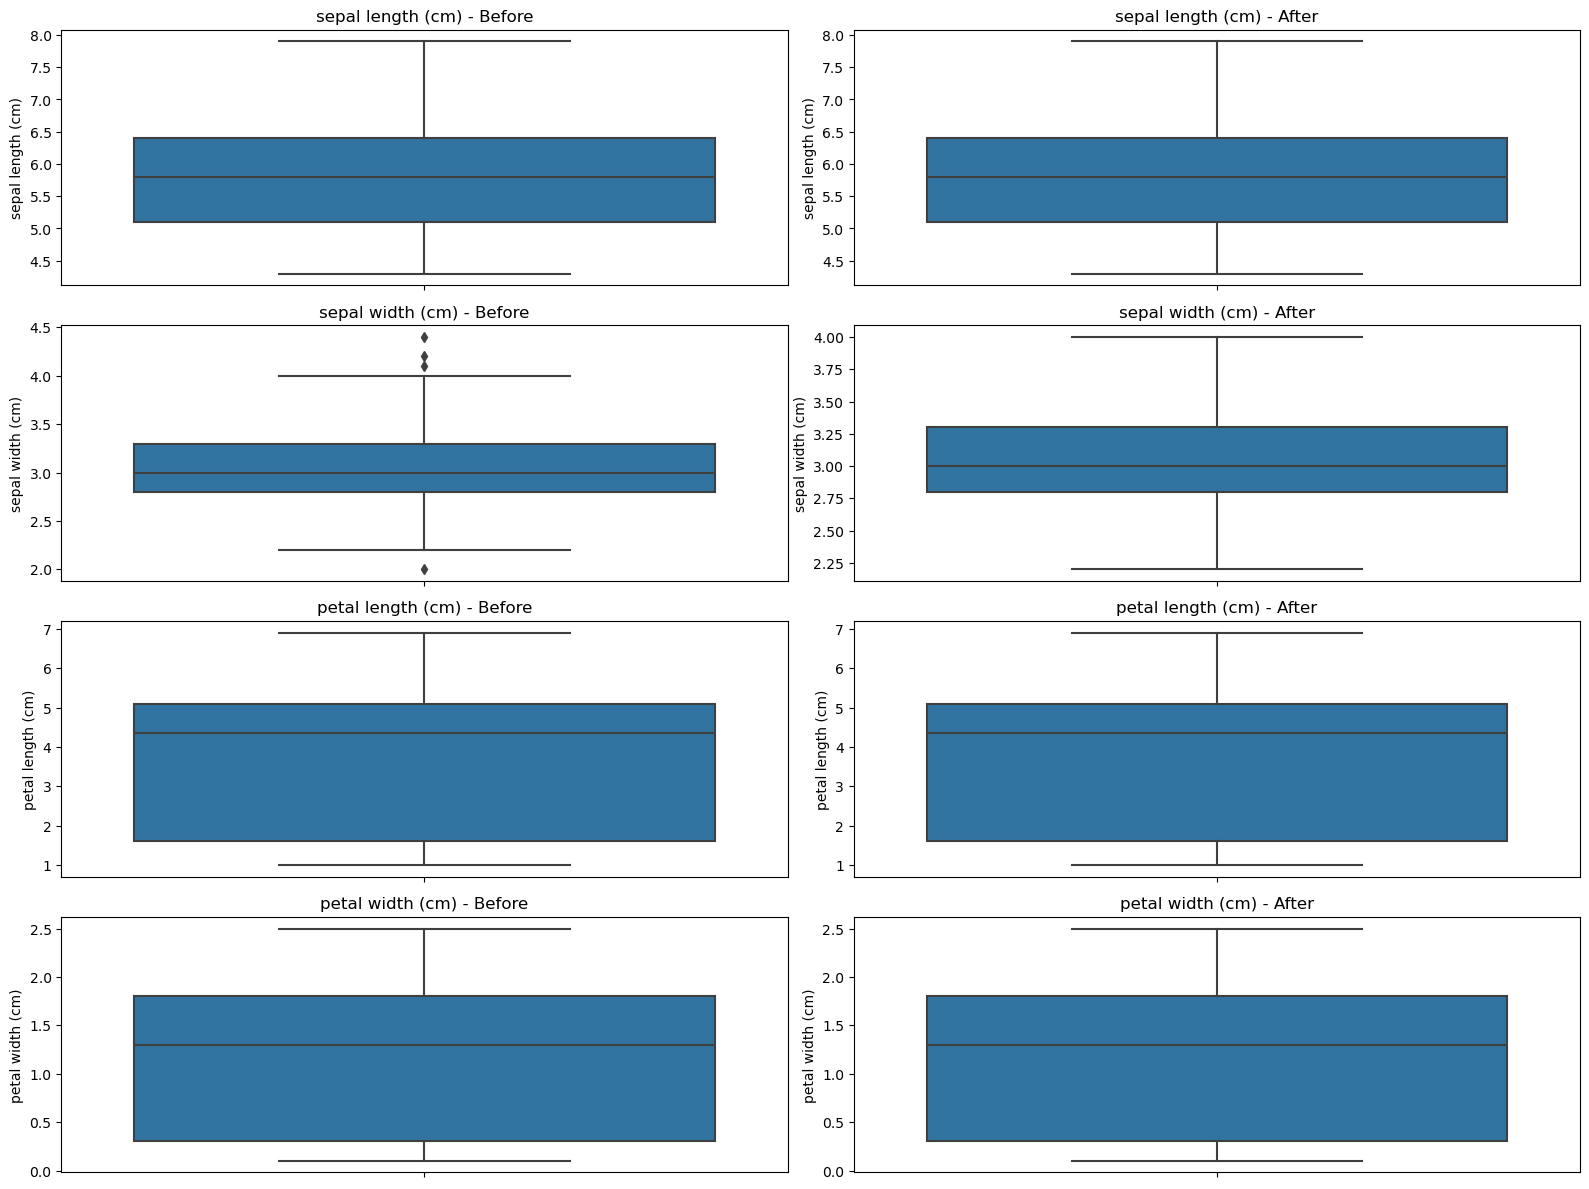

In [45]:
plt.figure(figsize=(16, 12))

features = df.columns[:-1]  # Exclude species

for i, col in enumerate(features):
    plt.subplot(len(features), 2, 2*i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Before')

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    filtered = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    
    plt.subplot(len(features), 2, 2*i + 2)
    sns.boxplot(y=filtered[col])
    plt.title(f'{col} - After')

plt.tight_layout()
plt.show()


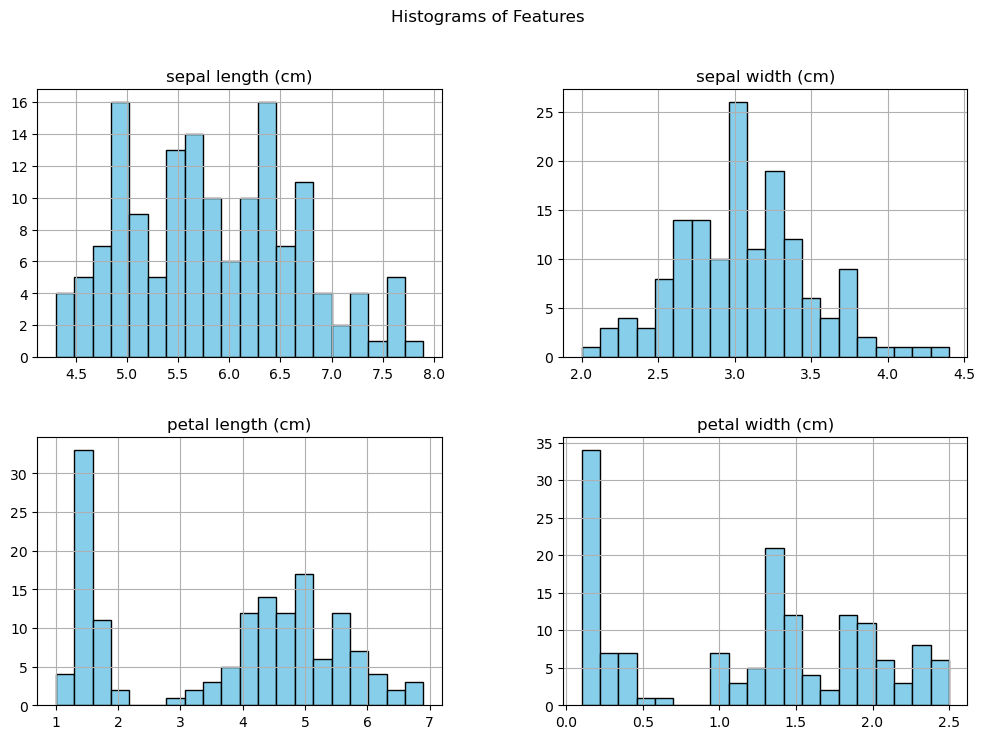

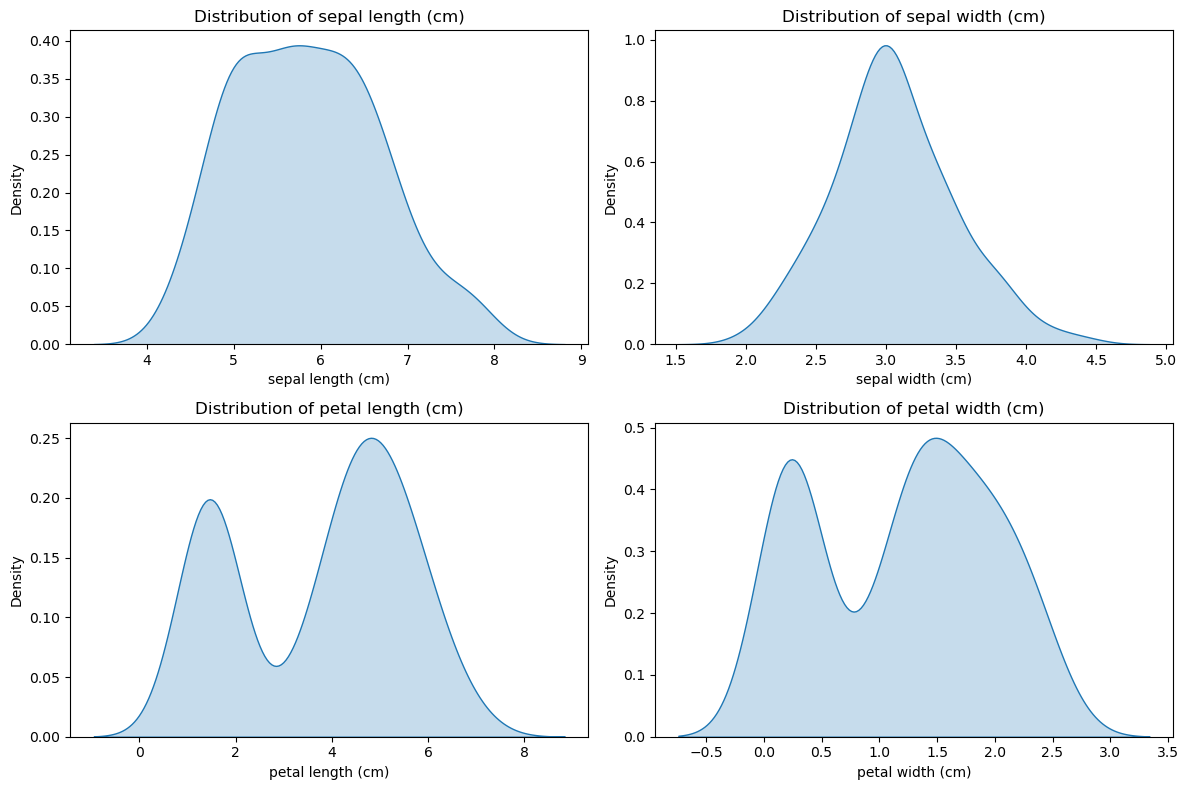

In [46]:
df[df.columns[:-1]].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

# KDE plots for all features
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

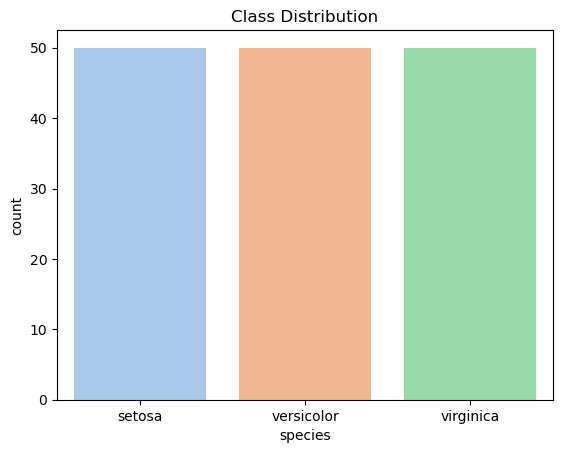

In [47]:
#4. Class Distribution
sns.countplot(x='species', data=df, palette='pastel')
plt.title('Class Distribution')
plt.show()

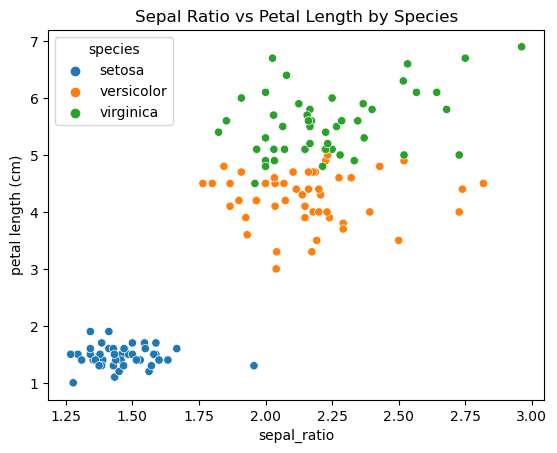

In [48]:
# Feature Engineering Insights (Example: Sepal Ratio)
data['sepal_ratio'] = data['sepal length (cm)'] / data['sepal width (cm)']

sns.scatterplot(x='sepal_ratio', y='petal length (cm)', hue='species', data=data)
plt.title('Sepal Ratio vs Petal Length by Species')
plt.show()

In [50]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

In [52]:
df['species_encoded']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_encoded, Length: 150, dtype: int32

In [53]:
#To get back original labels (if needed):
le.inverse_transform([0, 1, 2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [56]:
X = df.iloc[:, :4]

In [57]:
y = df.species_encoded

In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_encoded, Length: 150, dtype: int32

In [59]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [102]:
from sklearn.model_selection import train_test_split


# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [103]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [104]:
X_test.shape

(30, 4)

In [107]:
y_train.shape

(120,)

In [65]:
#Step: Standard Scaling (Z-score)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 

In [66]:
X_train_scaled

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [67]:
X_test_scale = scaler.transform(X_test)

In [69]:
X_test_scale.shape

(30, 4)

In [70]:
svc = SVC(kernel='rbf',  C=1.0,gamma='scale', random_state=42)

In [71]:
svc

SVC(random_state=42)

In [72]:
svc.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [74]:
y_pred = svc.predict(X_test_scale)

In [120]:
y_pred = np.array(y_pred,  ndmin=2)

In [121]:
type(y_pred)

numpy.ndarray

In [122]:
y_pred

array([[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]])

In [117]:
y_test= np.array(y_test,ndmin=2)

In [118]:
type(y_test)

numpy.ndarray

In [119]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [123]:
svc.score(y_test, y_pred)

ValueError: X has 3 features, but SVC is expecting 4 features as input.

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [88]:
accuracy_score(y_test, y_pred)

1.0

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [90]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [112]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [114]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [115]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_encoded, Length: 150, dtype: int32

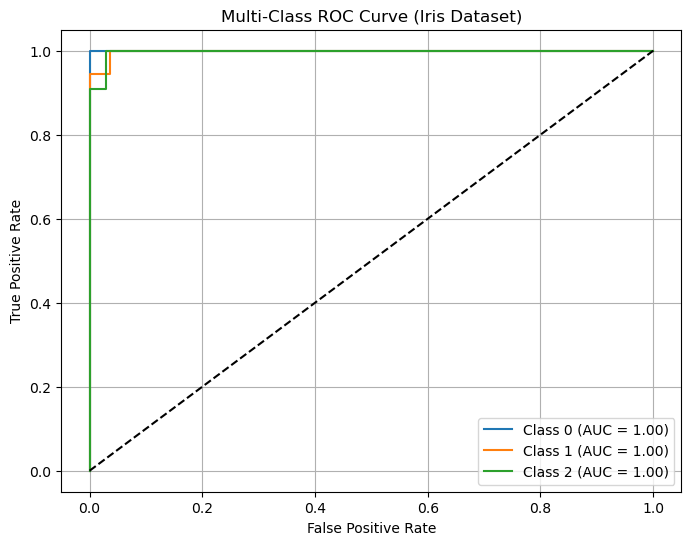

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output for ROC curve (One-vs-Rest)
y = label_binarize(y, classes=[0, 1, 2])  # shape: (n_samples, n_classes)
n_classes = y.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train OneVsRest SVC
clf = OneVsRestClassifier(SVC(probability=True))
clf.fit(X_train, y_train)

# Predict probabilities
y_score = clf.predict_proba(X_test)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (Iris Dataset)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [124]:
from sklearn.svm import SVR